# Interactive Text Encodings in NLP Workshop

Welcome to this interactive workshop on Text Encoding techniques in Natural Language Processing. This notebook will guide you through various text encoding methods, from basic one-hot encoding to advanced word embeddings, with hands-on examples and visualizations.

## Table of Contents

1. [Introduction](#introduction)
2. [Basic Implementation from Scratch](#basic)
3. [Interactive Concept Explanation](#interactive)
4. [Advanced Implementation with Libraries](#advanced)
5. [Data Flow Visualization](#visualization)
6. [User Interaction & Visualization](#user-interaction)
7. [Challenges & Edge Cases](#challenges)
8. [Conclusion & Further Reading](#conclusion)

## Setup and Imports

In [15]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
import spacy
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, HTML, Markdown, clear_output
import scipy.sparse as sp
import warnings
warnings.filterwarnings('ignore')

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Sample texts to use throughout the notebook
sample_texts = {
    "simple": "The quick brown fox jumps over the lazy dog.",
    "medium": "Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language.",
    "technical": "Text encodings transform natural language into numerical representations that machine learning models can understand. Common approaches include one-hot encoding, TF-IDF vectorization, and word embeddings.",
    "news": "The company announced yesterday that it would increase investments in artificial intelligence research. The CEO stated that this technology would dramatically improve their product offerings.",
    "multi_doc": [
        "The quick brown fox jumps over the lazy dog.",
        "Natural language processing helps computers understand human language.",
        "Machine learning models require numerical data as input.",
        "Text encodings transform words into vectors of numbers.",
        "Different encoding techniques have various advantages and disadvantages."
    ]
}

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/samarmohanty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samarmohanty/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samarmohanty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<a id='introduction'></a>
## 1. Introduction

Text encoding is a fundamental process in Natural Language Processing (NLP) that transforms text data into numerical representations that machine learning algorithms can understand. Since most ML algorithms work with numerical inputs, encoding text is an essential bridge between human language and computational models.

### Key Encoding Techniques

1. **One-Hot Encoding**
   - Represents each word as a binary vector
   - Vector length equals vocabulary size
   - Each word has a unique position set to 1, all other positions are 0
   - Simple but creates very high-dimensional, sparse vectors

2. **Count Vectorization (Bag of Words)**
   - Represents documents as vectors of word counts
   - Ignores word order but captures frequency information
   - Creates a document-term matrix where each row represents a document
   - Common technique for text classification and clustering

3. **TF-IDF (Term Frequency-Inverse Document Frequency)**
   - Extends BoW by weighting terms based on their importance
   - Emphasizes words that are frequent in a document but rare across documents
   - Reduces the impact of common words that appear in many documents
   - Particularly useful for information retrieval and document ranking

4. **Word Embeddings**
   - Represents words as dense vectors in a continuous vector space
   - Captures semantic relationships between words
   - Examples include Word2Vec, GloVe, and FastText
   - Lower dimensional and more efficient than one-hot encodings

### Real-World Applications

1. **Text Classification**
   - Sentiment analysis of customer reviews
   - Topic categorization of news articles
   - Spam detection in emails
   - Intent recognition in chatbots

2. **Search Engines**
   - Document indexing and retrieval
   - Ranking search results by relevance
   - Query expansion and suggestion
   - Semantic search capabilities

3. **Recommender Systems**
   - Content-based recommendation of articles or products
   - User profile modeling from text descriptions
   - Similarity calculations between items
   - Hybrid recommendation approaches

4. **Machine Translation**
   - Language modeling for translation systems
   - Cross-lingual information retrieval
   - Document alignment across languages
   - Transfer learning for low-resource languages

### Why Encoding Matters

The choice of text encoding significantly impacts model performance:

- **Dimensionality**: One-hot encodings create very high-dimensional spaces, leading to computational challenges
- **Sparsity**: Many encodings produce sparse matrices with mostly zeros, requiring special handling
- **Semantics**: Simple encodings lose semantic information, while advanced embeddings preserve it
- **Context**: Some encodings ignore word context, while others capture positional or contextual information
- **Scalability**: Different encoding methods scale differently with vocabulary size and corpus length

Let's start exploring these techniques by implementing them from scratch!

<a id='basic'></a>
## 2. Basic Implementation from Scratch

Let's implement core text encoding methods from scratch to understand how they work at a fundamental level. We'll build simple functions for one-hot encoding, bag-of-words, and TF-IDF using only basic Python and NumPy.

In [16]:
def preprocess_text(text, lowercase=True, remove_punctuation=True, remove_stopwords=False):
    """
    Preprocess text by lowercase conversion, punctuation removal, and tokenization.
    
    Parameters:
    -----------
    text : str
        The input text to preprocess
    lowercase : bool, default=True
        Whether to convert text to lowercase
    remove_punctuation : bool, default=True
        Whether to remove punctuation
    remove_stopwords : bool, default=False
        Whether to remove stopwords
        
    Returns:
    --------
    list
        A list of preprocessed tokens
    """
    # Convert to lowercase if specified
    if lowercase:
        text = text.lower()
    
    # Remove punctuation if specified
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords if specified
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
    
    return tokens

def build_vocabulary(documents, min_freq=1, max_vocab=None):
    """
    Build a vocabulary from a list of documents.
    
    Parameters:
    -----------
    documents : list
        List of strings (documents)
    min_freq : int, default=1
        Minimum frequency for a word to be included in the vocabulary
    max_vocab : int or None, default=None
        Maximum vocabulary size
        
    Returns:
    --------
    dict
        A dictionary mapping words to indices
    """
    # Count word frequencies
    word_counts = {}
    
    # Process each document
    for doc in documents:
        # Tokenize if the document is a string
        tokens = preprocess_text(doc) if isinstance(doc, str) else preprocess_text(' '.join(doc))
        
        # Count word frequencies
        for token in tokens:
            word_counts[token] = word_counts.get(token, 0) + 1
    
    # Filter words by minimum frequency
    filtered_words = {word: count for word, count in word_counts.items() if count >= min_freq}
    
    # Sort words by frequency (descending)
    sorted_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)
    
    # Limit vocabulary size if specified
    if max_vocab is not None:
        sorted_words = sorted_words[:max_vocab]
    
    # Create word-to-index mapping
    vocabulary = {word: idx for idx, (word, _) in enumerate(sorted_words)}
    
    return vocabulary

def one_hot_encode(text, vocabulary):
    """
    Perform one-hot encoding of a text using a given vocabulary.
    
    Parameters:
    -----------
    text : str
        The input text
    vocabulary : dict
        Dictionary mapping words to indices
        
    Returns:
    --------
    dict
        A dictionary with word indices and their one-hot vectors
    """
    # Get tokens from the text
    tokens = preprocess_text(text)
    
    # Initialize encoding dictionary
    encoding = {}
    
    # Process each token
    for token in tokens:
        # Skip if token is not in vocabulary
        if token not in vocabulary:
            continue
        
        # Get index of the token
        idx = vocabulary[token]
        
        # Create one-hot vector
        one_hot = np.zeros(len(vocabulary))
        one_hot[idx] = 1
        
        # Store in encoding dictionary
        encoding[token] = one_hot
    
    return encoding

def bag_of_words(text, vocabulary):
    """
    Create a bag-of-words representation of a text using a given vocabulary.
    
    Parameters:
    -----------
    text : str
        The input text
    vocabulary : dict
        Dictionary mapping words to indices
        
    Returns:
    --------
    numpy.ndarray
        A vector of word counts
    """
    # Get tokens from the text
    tokens = preprocess_text(text)
    
    # Initialize counts vector
    bow_vector = np.zeros(len(vocabulary))
    
    # Count tokens that appear in the vocabulary
    for token in tokens:
        if token in vocabulary:
            bow_vector[vocabulary[token]] += 1
    
    return bow_vector

def compute_tf_idf(documents, vocabulary=None, min_freq=1, max_vocab=None):
    """
    Compute TF-IDF vectors for a collection of documents.
    
    Parameters:
    -----------
    documents : list
        List of strings (documents)
    vocabulary : dict or None, default=None
        Dictionary mapping words to indices. If None, a new vocabulary is built.
    min_freq : int, default=1
        Minimum frequency for a word to be included in the vocabulary
    max_vocab : int or None, default=None
        Maximum vocabulary size
        
    Returns:
    --------
    tuple
        (TF-IDF matrix, vocabulary)
    """
    # Build vocabulary if not provided
    if vocabulary is None:
        vocabulary = build_vocabulary(documents, min_freq=min_freq, max_vocab=max_vocab)
    
    # Build document-term matrix (counts)
    doc_term_matrix = np.zeros((len(documents), len(vocabulary)))
    
    # Fill the document-term matrix
    for doc_idx, doc in enumerate(documents):
        doc_term_matrix[doc_idx] = bag_of_words(doc, vocabulary)
    
    # Compute document frequency (number of documents containing each term)
    df = np.sum(doc_term_matrix > 0, axis=0)
    
    # Compute IDF
    idf = np.log((len(documents) + 1) / (df + 1)) + 1
    
    # Compute TF-IDF
    tf_idf_matrix = doc_term_matrix * idf
    
    return tf_idf_matrix, vocabulary

def demonstrate_encodings(text):
    """
    Demonstrate different encoding methods on a single text.
    
    Parameters:
    -----------
    text : str
        The input text
    """
    # Preprocess text
    tokens = preprocess_text(text)
    print(f"Preprocessed tokens: {tokens}\n")
    
    # Build vocabulary
    vocabulary = build_vocabulary([text])
    print(f"Vocabulary: {vocabulary}\n")
    
    # One-hot encoding
    one_hot = one_hot_encode(text, vocabulary)
    
    # Display one-hot encoding for the first few words
    print("One-hot encoding examples:")
    for i, (word, encoding) in enumerate(one_hot.items()):
        if i >= 3:  # Show only first 3 words
            break
        print(f"  '{word}': {encoding}")
    print()
    
    # Bag of Words
    bow = bag_of_words(text, vocabulary)
    print(f"Bag of Words: {bow}\n")
    
    # TF-IDF
    tf_idf, _ = compute_tf_idf([text], vocabulary)
    print(f"TF-IDF: {tf_idf[0]}\n")
    
    # Dimensionality comparison
    print("Encoding Dimensions:")
    print(f"  One-hot encoding dimension per word: {len(vocabulary)}")
    print(f"  Bag of Words dimension for document: {len(bow)}")
    print(f"  TF-IDF dimension for document: {len(tf_idf[0])}")

# Create interactive widgets
text_input = widgets.Textarea(
    value=sample_texts["medium"],
    placeholder='Enter text to encode...',
    description='Text:',
    disabled=False,
    layout=widgets.Layout(width='90%', height='100px')
)

example_dropdown = widgets.Dropdown(
    options=list(sample_texts.keys()),
    value='medium',
    description='Examples:',
    disabled=False,
)

def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        # Update text input with selected example
        text_input.value = sample_texts[change['new']]

example_dropdown.observe(on_dropdown_change)

def analyze_encodings(text):
    clear_output()
    display(example_dropdown)
    display(text_input)
    print("\n--- Encoding Analysis ---\n")
    demonstrate_encodings(text)

# Display widgets
display(example_dropdown)
display(text_input)

# Create interact widget for processing
interact(analyze_encodings, text=text_input);

Dropdown(description='Examples:', index=1, options=('simple', 'medium', 'technical', 'news', 'multi_doc'), val…

Textarea(value='Natural language processing (NLP) is a subfield of linguistics, computer science, and artifici…

interactive(children=(Textarea(value='Natural language processing (NLP) is a subfield of linguistics, computer…

<a id='interactive'></a>
## 3. Interactive Concept Explanation

Let's explore text encoding concepts interactively with visualizations and examples. This section will help you understand how different encoding methods represent text and how parameters like vocabulary size affect these representations.

Interactive Encoding Exploration


interactive(children=(Dropdown(description='Document:', options=(('Document 1', 0), ('Document 2', 1), ('Docum…


Exploring Impact of Vocabulary Size


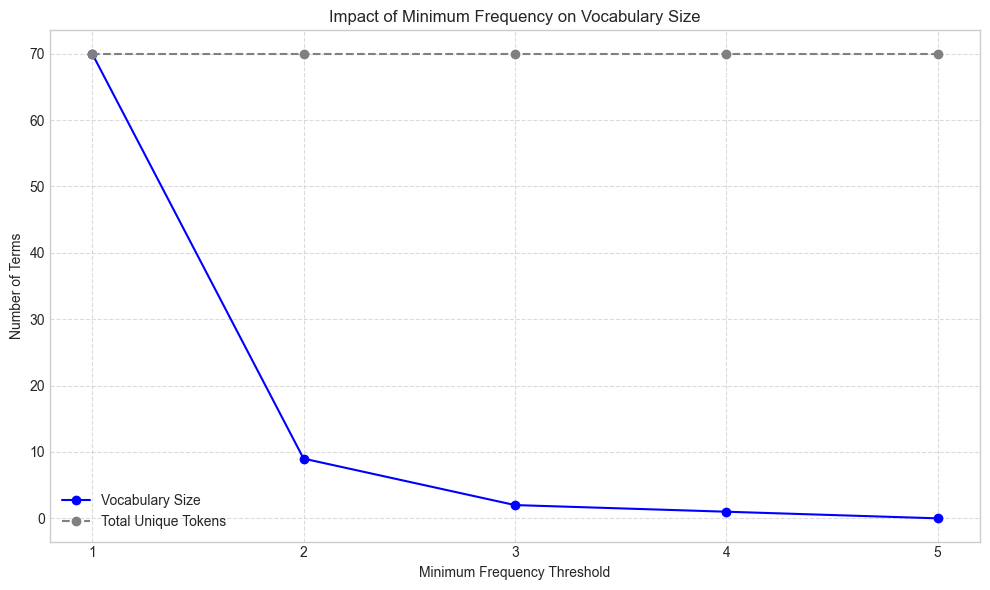

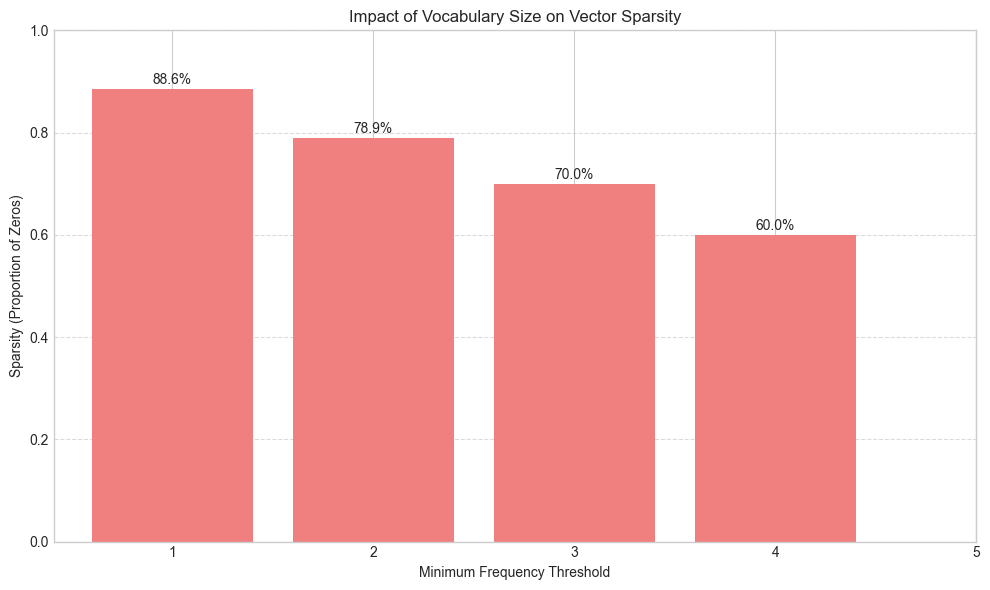

Impact of Vocabulary Size on Encoding:
- Larger vocabularies increase vector dimensionality
- Higher minimum frequency thresholds reduce vocabulary size
- Vector sparsity generally increases with larger vocabularies
- Dimensionality reduction becomes more important with larger vocabularies

Trade-offs:
- Small vocabulary: Lower dimensionality but may lose important terms
- Large vocabulary: Better representation but higher sparsity and computational cost
- Frequency thresholds help filter out rare terms that may represent noise
- Optimal vocabulary size depends on the specific task and dataset


In [18]:
def create_interactive_exploration():
    """
    Create interactive widgets to explore different encoding parameters.
    """
    # Sample documents
    documents = sample_texts["multi_doc"]
    
    # Create widgets
    doc_dropdown = widgets.Dropdown(
        options=[(f"Document {i+1}", i) for i in range(len(documents))],
        value=0,
        description='Document:',
        style={'description_width': 'initial'}
    )
    
    min_freq_slider = widgets.IntSlider(
        value=1,
        min=1,
        max=5,
        step=1,
        description='Min Frequency:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d',
        style={'description_width': 'initial'}
    )
    
    max_vocab_slider = widgets.IntSlider(
        value=20,
        min=5,
        max=50,
        step=5,
        description='Max Vocab Size:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d',
        style={'description_width': 'initial'}
    )
    
    remove_stopwords = widgets.Checkbox(
        value=False,
        description='Remove Stopwords',
        disabled=False,
        style={'description_width': 'initial'}
    )
    
    encoding_method = widgets.RadioButtons(
        options=['One-Hot', 'Bag of Words', 'TF-IDF'],
        value='Bag of Words',
        description='Encoding:',
        disabled=False,
        style={'description_width': 'initial'}
    )
    
    def update_visualization(doc_index, min_freq, max_vocab, remove_stopwords_val, encoding_type):
        """Update visualization based on widget values"""
        # Get selected document
        doc = documents[doc_index]
        
        # Preprocess text
        tokens = preprocess_text(doc, remove_stopwords=remove_stopwords_val)
        
        # Build vocabulary from all documents with constraints
        vocabulary = build_vocabulary(documents, min_freq=min_freq, max_vocab=max_vocab)
        
        # Display document and preprocessing info
        print(f"Document: \"{doc}\"")
        print(f"Tokens after preprocessing: {tokens}")
        print(f"Vocabulary size: {len(vocabulary)} words")
        print(f"Vocabulary: {vocabulary}\n")
        
        # Visualize based on encoding type
        if encoding_type == 'One-Hot':
            visualize_one_hot(doc, vocabulary, remove_stopwords_val)
        elif encoding_type == 'Bag of Words':
            visualize_bow(documents, doc_index, vocabulary, remove_stopwords_val)
        else:  # TF-IDF
            visualize_tfidf(documents, doc_index, vocabulary, remove_stopwords_val)
    
    # Create interactive widget
    interactive_widget = interactive(
        update_visualization,
        doc_index=doc_dropdown,
        min_freq=min_freq_slider,
        max_vocab=max_vocab_slider,
        remove_stopwords_val=remove_stopwords,
        encoding_type=encoding_method
    )
    
    # Display the widget
    display(interactive_widget)

def visualize_one_hot(document, vocabulary, remove_stopwords=False):
    """
    Visualize one-hot encoding for a document.
    
    Parameters:
    -----------
    document : str
        The input document
    vocabulary : dict
        Dictionary mapping words to indices
    remove_stopwords : bool, default=False
        Whether to remove stopwords during preprocessing
    """
    # Preprocess the document
    tokens = preprocess_text(document, remove_stopwords=remove_stopwords)
    
    # Filter tokens to those in vocabulary
    tokens_in_vocab = [token for token in tokens if token in vocabulary]
    
    # Create one-hot encodings
    encodings = {}
    for token in tokens_in_vocab:
        vector = np.zeros(len(vocabulary))
        vector[vocabulary[token]] = 1
        encodings[token] = vector
    
    # Create heatmap data
    heatmap_data = np.zeros((len(tokens_in_vocab), len(vocabulary)))
    for i, token in enumerate(tokens_in_vocab):
        heatmap_data[i] = encodings[token]
    
    # Create heatmap
    plt.figure(figsize=(12, max(3, len(tokens_in_vocab) * 0.4)))
    sns.heatmap(heatmap_data, 
                cmap=sns.color_palette("Blues", 2), 
                annot=True,
                fmt='g',
                cbar=False,
                xticklabels=list(vocabulary.keys()),
                yticklabels=tokens_in_vocab)
    plt.title('One-Hot Encoding Representation')
    plt.xlabel('Vocabulary Terms')
    plt.ylabel('Tokens in Document')
    plt.tight_layout()
    plt.show()
    
    # Explanation
    print("One-Hot Encoding Characteristics:")
    print("- Each word is represented by a binary vector of length equal to vocabulary size")
    print("- The vector contains a single 1 at the position corresponding to the word index")
    print("- All other positions contain 0")
    print(f"- Dimensionality: {len(vocabulary)} dimensions per word")
    print(f"- Sparsity: {(len(vocabulary) - 1) / len(vocabulary):.1%} of values are zero")
    
    # Potential issues
    print("\nPotential Issues:")
    print("- High dimensionality: As vocabulary grows, vectors become very large")
    print("- No semantic relationships: Similar words have completely different encodings")
    print("- Binary only: Doesn't capture word frequency or importance")

def visualize_bow(documents, doc_index, vocabulary, remove_stopwords=False):
    """
    Visualize bag-of-words encoding for a document.
    
    Parameters:
    -----------
    documents : list
        List of documents
    doc_index : int
        Index of the document to visualize
    vocabulary : dict
        Dictionary mapping words to indices
    remove_stopwords : bool, default=False
        Whether to remove stopwords during preprocessing
    """
    # Get the document
    document = documents[doc_index]
    
    # Compute Bag of Words for all documents
    doc_term_matrix = np.zeros((len(documents), len(vocabulary)))
    
    for i, doc in enumerate(documents):
        tokens = preprocess_text(doc, remove_stopwords=remove_stopwords)
        for token in tokens:
            if token in vocabulary:
                doc_term_matrix[i, vocabulary[token]] += 1
    
    # Get BoW vector for the current document
    bow_vector = doc_term_matrix[doc_index]
    
    # Create bar chart for word frequencies
    plt.figure(figsize=(12, 5))
    
    # Get vocab words and their counts for this document
    word_counts = {word: bow_vector[idx] for word, idx in vocabulary.items() if bow_vector[idx] > 0}
    words = list(word_counts.keys())
    counts = list(word_counts.values())
    
    # Sort words by frequency
    sorted_indices = np.argsort(counts)[::-1]
    words = [words[i] for i in sorted_indices]
    counts = [counts[i] for i in sorted_indices]
    
    # Create bar chart
    plt.bar(words, counts, color='skyblue')
    plt.title('Bag of Words (Term Frequency) Representation')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Create heatmap comparing documents
    plt.figure(figsize=(12, len(documents) * 0.5 + 2))
    sns.heatmap(doc_term_matrix, 
                cmap='YlGnBu', 
                annot=True,
                fmt='g',
                xticklabels=list(vocabulary.keys()),
                yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
    plt.title('Document-Term Matrix (Bag of Words)')
    plt.xlabel('Vocabulary Terms')
    plt.ylabel('Documents')
    plt.tight_layout()
    plt.show()
    
    # Explanation
    print("Bag of Words Characteristics:")
    print("- Documents are represented as vectors of word counts")
    print("- Word order is lost but frequency information is preserved")
    print(f"- Dimensionality: {len(vocabulary)} dimensions per document")
    print(f"- Sparsity: {np.sum(bow_vector == 0) / len(bow_vector):.1%} of values are zero")
    
    # Number of unique terms used
    unique_terms = np.sum(bow_vector > 0)
    print(f"- This document uses {unique_terms} unique terms out of {len(vocabulary)} in the vocabulary")
    
    # Potential issues
    print("\nPotential Issues:")
    print("- Ignores word order and context")
    print("- Common words dominate the representation")
    print("- High dimensionality with large vocabularies")
    print("- Sparse representation (many zeros)")

def visualize_tfidf(documents, doc_index, vocabulary, remove_stopwords=False):
    """
    Visualize TF-IDF encoding for a document.
    
    Parameters:
    -----------
    documents : list
        List of documents
    doc_index : int
        Index of the document to visualize
    vocabulary : dict
        Dictionary mapping words to indices
    remove_stopwords : bool, default=False
        Whether to remove stopwords during preprocessing
    """
    # Compute TF-IDF
    tf_idf_matrix, _ = compute_tf_idf(documents, vocabulary)
    
    # Get TF-IDF vector for the current document
    tfidf_vector = tf_idf_matrix[doc_index]
    
    # Create bar chart for word importance
    plt.figure(figsize=(12, 5))
    
    # Get vocab words and their TF-IDF scores for this document
    word_scores = {word: tfidf_vector[idx] for word, idx in vocabulary.items() if tfidf_vector[idx] > 0}
    words = list(word_scores.keys())
    scores = list(word_scores.values())
    
    # Sort words by TF-IDF score
    sorted_indices = np.argsort(scores)[::-1]
    words = [words[i] for i in sorted_indices]
    scores = [scores[i] for i in sorted_indices]
    
    # Create bar chart
    plt.bar(words, scores, color='lightgreen')
    plt.title('TF-IDF Representation')
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Create heatmap comparing documents
    plt.figure(figsize=(12, len(documents) * 0.5 + 2))
    sns.heatmap(tf_idf_matrix, 
                cmap='YlOrRd', 
                xticklabels=list(vocabulary.keys()),
                yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
    plt.title('Document-Term Matrix (TF-IDF)')
    plt.xlabel('Vocabulary Terms')
    plt.ylabel('Documents')
    plt.tight_layout()
    plt.show()
    
    # Compare Term Frequency vs TF-IDF
    plt.figure(figsize=(12, 5))
    
    # Compute the bag of words for comparison
    bow_vector = np.zeros(len(vocabulary))
    tokens = preprocess_text(documents[doc_index], remove_stopwords=remove_stopwords)
    for token in tokens:
        if token in vocabulary:
            bow_vector[vocabulary[token]] += 1
    
    # Get words with non-zero values in either representation
    non_zero_indices = np.logical_or(bow_vector > 0, tfidf_vector > 0)
    selected_words = [word for word, idx in vocabulary.items() if non_zero_indices[idx]]
    bow_values = [bow_vector[vocabulary[word]] for word in selected_words]
    tfidf_values = [tfidf_vector[vocabulary[word]] for word in selected_words]
    
    # Sort by TF-IDF values
    sorted_indices = np.argsort(tfidf_values)[::-1]
    selected_words = [selected_words[i] for i in sorted_indices]
    bow_values = [bow_values[i] for i in sorted_indices]
    tfidf_values = [tfidf_values[i] for i in sorted_indices]
    
    # Normalize values for comparison
    if max(bow_values) > 0:
        bow_values = [val/max(bow_values) for val in bow_values]
    if max(tfidf_values) > 0:
        tfidf_values = [val/max(tfidf_values) for val in tfidf_values]
    
    # Plot comparison
    x = np.arange(len(selected_words))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(x - width/2, bow_values, width, label='Term Frequency (normalized)')
    ax.bar(x + width/2, tfidf_values, width, label='TF-IDF (normalized)')
    
    ax.set_title('Term Frequency vs TF-IDF Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(selected_words, rotation=45, ha='right')
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    # Explanation
    print("TF-IDF Characteristics:")
    print("- Extends Bag of Words by weighting terms based on importance")
    print("- Downweights common words that appear in many documents")
    print("- Highlights terms unique to specific documents")
    print(f"- Dimensionality: {len(vocabulary)} dimensions per document")
    print(f"- Sparsity: {np.sum(tfidf_vector == 0) / len(tfidf_vector):.1%} of values are zero")
    
    # Important terms
    if len(words) > 0:
        print(f"\nTop 3 important terms by TF-IDF:")
        for i in range(min(3, len(words))):
            print(f"  - '{words[i]}': {scores[i]:.4f}")
    
    # Potential advantages
    print("\nAdvantages over Bag of Words:")
    print("- Reduces impact of common words")
    print("- Emphasizes distinctive terms")
    print("- Better captures term importance")
    print("- Improves performance in document classification and search")

def explore_vocab_size_impact():
    """
    Explore the impact of vocabulary size on encoding dimensionality.
    """
    # Sample corpus
    corpus = [
        "The quick brown fox jumps over the lazy dog.",
        "Natural language processing helps computers understand human language.",
        "Machine learning models require numerical data as input.",
        "Text encodings transform words into vectors of numbers.",
        "Different encoding techniques have various advantages and disadvantages.",
        "Algorithms can learn patterns from vectorized text representations.",
        "Data scientists use NLP to extract insights from unstructured text.",
        "Neural networks have revolutionized natural language understanding.",
        "Word embeddings capture semantic relationships between words.",
        "Text classification assigns categories to documents based on content."
    ]
    
    # Compute vocabulary sizes for different min frequencies
    vocab_sizes = []
    unique_token_counts = []
    min_freqs = list(range(1, 6))
    
    for min_freq in min_freqs:
        vocabulary = build_vocabulary(corpus, min_freq=min_freq)
        vocab_sizes.append(len(vocabulary))
        
        # Count unique tokens across corpus
        all_tokens = []
        for doc in corpus:
            tokens = preprocess_text(doc)
            all_tokens.extend(tokens)
        unique_tokens = set(all_tokens)
        unique_token_counts.append(len(unique_tokens))
    
    # Plot vocabulary size vs min frequency
    plt.figure(figsize=(10, 6))
    plt.plot(min_freqs, vocab_sizes, 'o-', color='blue', label='Vocabulary Size')
    plt.plot(min_freqs, unique_token_counts, 'o--', color='gray', label='Total Unique Tokens')
    
    plt.title('Impact of Minimum Frequency on Vocabulary Size')
    plt.xlabel('Minimum Frequency Threshold')
    plt.ylabel('Number of Terms')
    plt.xticks(min_freqs)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Bar chart of document vector sparsity with different vocabulary sizes
    plt.figure(figsize=(10, 6))
    
    # Calculate sparsity for different vocabulary sizes
    sparsity_values = []
    for min_freq in min_freqs:
        vocabulary = build_vocabulary(corpus, min_freq=min_freq)
        bow_matrix = np.zeros((len(corpus), len(vocabulary)))
        
        for i, doc in enumerate(corpus):
            bow_matrix[i] = bag_of_words(doc, vocabulary)
        
        # Calculate sparsity (proportion of zeros)
        sparsity = np.sum(bow_matrix == 0) / bow_matrix.size
        sparsity_values.append(sparsity)
    
    # Plot sparsity
    plt.bar(min_freqs, sparsity_values, color='lightcoral')
    plt.title('Impact of Vocabulary Size on Vector Sparsity')
    plt.xlabel('Minimum Frequency Threshold')
    plt.ylabel('Sparsity (Proportion of Zeros)')
    plt.xticks(min_freqs)
    
    # Add value labels above bars
    for i, v in enumerate(sparsity_values):
        plt.text(min_freqs[i], v + 0.01, f'{v:.1%}', ha='center')
    
    plt.ylim(0, 1.0)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Explanation
    print("Impact of Vocabulary Size on Encoding:")
    print("- Larger vocabularies increase vector dimensionality")
    print("- Higher minimum frequency thresholds reduce vocabulary size")
    print("- Vector sparsity generally increases with larger vocabularies")
    print("- Dimensionality reduction becomes more important with larger vocabularies")
    
    print("\nTrade-offs:")
    print("- Small vocabulary: Lower dimensionality but may lose important terms")
    print("- Large vocabulary: Better representation but higher sparsity and computational cost")
    print("- Frequency thresholds help filter out rare terms that may represent noise")
    print("- Optimal vocabulary size depends on the specific task and dataset")

# Create the main interactive exploration
print("Interactive Encoding Exploration")
create_interactive_exploration()

# Demonstrate impact of vocabulary size
print("\nExploring Impact of Vocabulary Size")
explore_vocab_size_impact()